# This notebook is to create some draft bayesian networks based on the survey data (to be) collected 

# Survey Variables

## (A) Human Activity & Exposure (Survey Data)
- Resident Location (Villages around the lake)
- Activity Types (Swimming, fishing, boating, drinking water use, etc.)
- Activity Frequency (Daily, weekly, monthly)
- Activity Locations (Spatial data from the survey)
- Historical Familiarity (Years of knowledge, used as weights)
- Observed Symptoms (Skin irritation, stomach issues, fever, etc.)

## (B) Perceived & Observed Water Quality (Survey Data)
- Self-Reported Water Quality (Good, moderate, poor)
- Foamy/Muddy Water Presence (Yes/No + spatial location)
- Odor/Smell Detection (Yes/No + spatial location)
- Water Level Issues (Yes/No + spatial location)
- Floating Debris Presence (Yes/No + spatial location)
- Observed Cyanobacteria Blooms (Yes/No + spatial location)
- Bloom Intensity (Low, Medium, High)
- Economic Activities Affecting Water Quality (Agriculture, industry, etc.)
- Confidence in Answers (Used as weights)

## (C) Environmental Data (Public Data)
- Sunlight Exposure (Hours per day)
- Air Temperature (°C)
- Water Temperature (°C)
- Land Use (Agriculture, urban, forest, etc.)
- Precipitation (Rainfall trends)

## (D) Risk Assessment Nodes
Risk at Beaches (High, Medium, Low) → Dependent on:
- Activity Type & Frequency
- Observed Cyanobacteria Blooms (survey)
- Environmental Conditions (temperature, precipitation, etc.)
- Risk at Drinking Water Intake (High, Medium, Low) → Dependent on:
- Bloom Observations near the dam
- Water Level Changes
- Floating Debris Presence

# Bayesian network

## Causal Relationships
Edges represent dependencies between nodes:

- Water Quality Perception ← Odor, Debris, Water Level Issues, Bloom Observations
- Cyanobacteria Bloom Risk ← Sunlight, Water Temperature, Land Use, Rainfall
- Beach Risk ← Bloom Presence, Activity Type, Exposure Time
- Drinking Water Risk ← Bloom Near Dam, Floating Debris, Water Level Changes

## Incorporating spatial data
- Survey responses indicating bloom locations & water issues → Will be converted into GIS layers.
- Proximity to beaches & drinking water intake → GIS processing will classify bloom locations into immediate, intermediate, or far zones.
- Bayesian Model Inputs:
    - Nodes will include "Bloom Risk at Zone X" where X = (Beach 1, Beach 2, Drinking Water Intake, etc.).
    - Each zone will be a probabilistic node in the BN, with CPDs influenced by environmental data and survey results.

## Handling Temporal Data
- Survey responses about bloom trends over years → Create a node "Cyanobacteria Trend Over Time".
- Public Data Trends → Nodes for historical temperature, rainfall, land use changes.

**Use Dynamic Bayesian Networks (DBNs) to capture time-series dependencies.**

# Load libs

In [6]:
import numpy as np
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

import pygraphviz as pgv
import networkx as nx
import matplotlib.pyplot as plt

## Define the Bayesian Network Structure

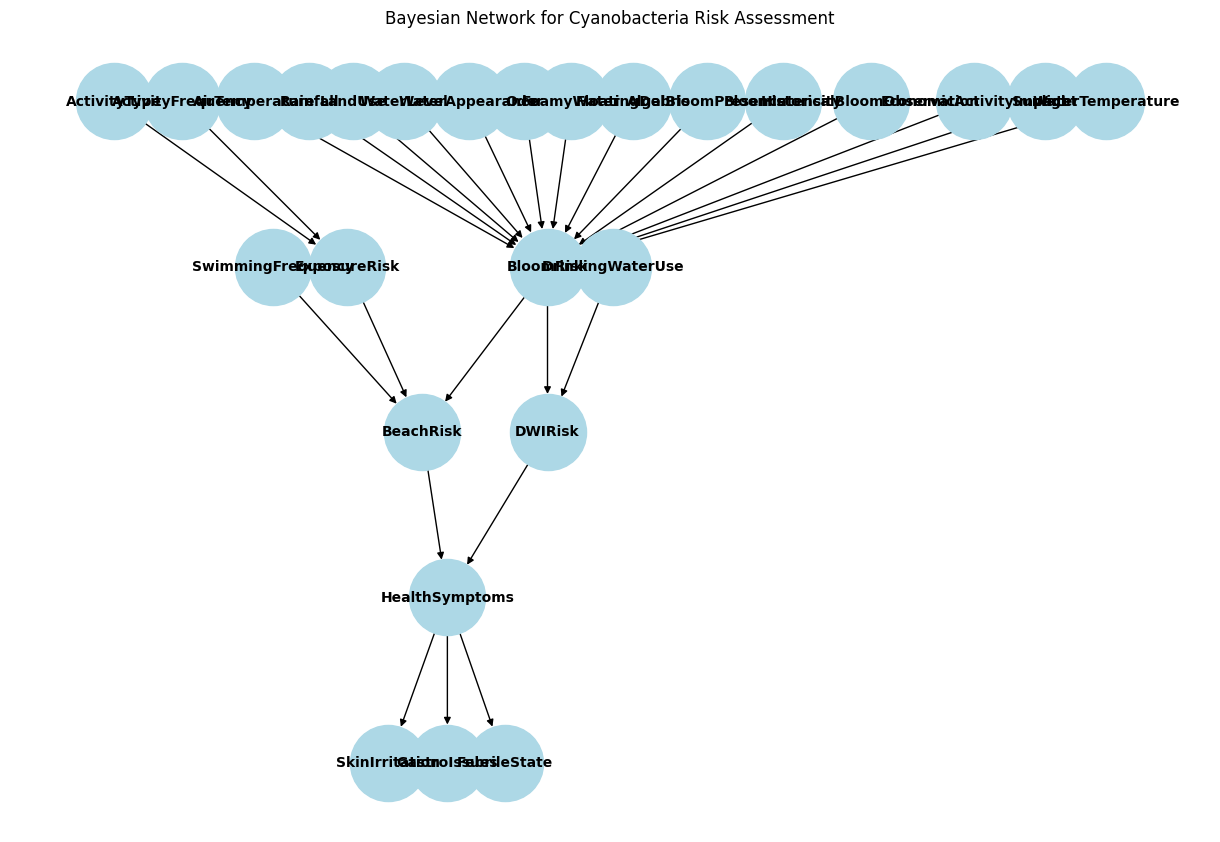

In [12]:
# Define Bayesian Network structure
model = BayesianNetwork([
    # Environmental factors influencing bloom risk
    ("Sunlight", "BloomRisk"), 
    ("WaterTemperature", "BloomRisk"), 
    ("AirTemperature", "BloomRisk"), 
    ("Rainfall", "BloomRisk"), 
    ("LandUse", "BloomRisk"), 
    ("WaterLevel", "BloomRisk"),

    # Local observations influencing bloom risk
    ("WaterAppearance", "BloomRisk"), 
    ("Odor", "BloomRisk"), 
    ("FoamyWater", "BloomRisk"), 
    ("FloatingDebris", "BloomRisk"), 
    ("AlgalBloomPresence", "BloomRisk"), 
    ("BloomIntensity", "BloomRisk"), 
    ("HistoricalBloomObservation", "BloomRisk"), 
    ("EconomicActivityImpact", "BloomRisk"),

    # Exposure and activity factors influencing beach risk and drinking water risk
    ("ActivityType", "ExposureRisk"),
    ("ActivityFrequency", "ExposureRisk"),
    ("ExposureRisk", "BeachRisk"), 
    ("SwimmingFrequency", "BeachRisk"),
    ("DrinkingWaterUse", "DWIRisk"),

    # Bloom risk affects beach risk and drinking water intake risk
    ("BloomRisk", "BeachRisk"), 
    ("BloomRisk", "DWIRisk"),

    # Health risks associated with exposure
    ("BeachRisk", "HealthSymptoms"), 
    ("DWIRisk", "HealthSymptoms"),
    ("HealthSymptoms", "SkinIrritation"), 
    ("HealthSymptoms", "GastroIssues"), 
    ("HealthSymptoms", "FebrileState")
])

# Convert pgmpy model to networkx graph
graph = nx.DiGraph(model.edges())
pos = nx.spring_layout(graph)

# Draw using pygraphviz
plt.figure(figsize=(12, 8))
pos = nx.nx_agraph.graphviz_layout(graph, prog="dot")
nx.draw(graph, pos, with_labels=True, node_size=3000, node_color="lightblue", edge_color="black", font_size=10, font_weight="bold")

plt.title("Bayesian Network for Cyanobacteria Risk Assessment")
plt.show()

## Define CPDs (example probabilities, to be refined with real data)

## BloomRisk depends on Sunlight, WaterTemperature, Rainfall, and LandUse